Source of geographical data: 
Agencia Digital de Innovación Pública “Sistema Abierto de Información Geográfica (SIGCDMX)” Disponible en: https://sig.cdmx.gob.mx/

Other data was obtained from https://datos.cdmx.gob.mx/dataset/uo-de-suelo#


Required libraries:

In [2]:
import requests # library to handle requests

import pandas as pd # library for data analsysis

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # plotting library

# tranforming json file into a pandas dataframe library
from pandas import json_normalize

# Neighborhoods in Mexico City

The data related to the neighborhoods in Mexico City was obtained from the Digital Agency for Public Innovation “Sistema Abierto de Información Geográfica (SIGCDMX)": https://datos.cdmx.gob.mx/dataset/coloniascdmx

In [ ]:
df = pd.read_csv('data/coloniascdmx.csv')
df = df[['alcaldia','nombre','geo_point_2d']]
df.dropna()
df.head()

,alcaldia,nombre,geo_point_2d
0,MIGUEL HIDALGO,LOMAS DE CHAPULTEPEC,"19.4228411174,-99.2157935754"
1,MIGUEL HIDALGO,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),"19.4106158914,-99.2262487268"
2,MIGUEL HIDALGO,DEL BOSQUE (POLANCO),"19.4342189235,-99.2094037513"
3,COYOACAN,PEDREGAL DE SANTA URSULA I,"19.314862237,-99.1477954505"
4,COYOACAN,AJUSCO I,"19.324571116,-99.1561602234"


Cleaning the data to only get the name, longitude and latitude from neighborhoods.

In [ ]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [ ]:
for data in df.values:
    try:
        borough = data[0] 
        #print(borough)
        neighborhood_name = data[1]
        
        neighborhood_latlon = str(data[2]).split(',')
        #print(neighborhood_latlon)
        neighborhood_lat = float(neighborhood_latlon[0])
        #print(neighborhood_lat)
        neighborhood_lon = float(neighborhood_latlon[1])
        #print(neighborhood_lon)
        neighborhoods = neighborhoods.append({'Borough': borough,
                                              'Neighborhood': neighborhood_name,
                                              'Latitude': neighborhood_lat,
                                              'Longitude': neighborhood_lon},ignore_index=True)
    except:
        continue

In [ ]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,MIGUEL HIDALGO,LOMAS DE CHAPULTEPEC,19.422841,-99.215794
1,MIGUEL HIDALGO,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),19.410616,-99.226249
2,MIGUEL HIDALGO,DEL BOSQUE (POLANCO),19.434219,-99.209404
3,COYOACAN,PEDREGAL DE SANTA URSULA I,19.314862,-99.147795
4,COYOACAN,AJUSCO I,19.324571,-99.156160


In [ ]:
neighborhoods.to_csv('data/p_neighborhoods.csv', index=False)
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 16 boroughs and 1808 neighborhoods.


Getting the latitude and longutude of Mexico City:

In [ ]:
address = 'Mexico City'

geolocator = Nominatim(user_agent="mx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico City are 19.4326296, -99.1331785.


Create the map:

In [ ]:
# create map of New York using latitude and longitude values
map_mexicocity = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mexicocity)  
    
map_mexicocity

# Data about restaurant in Mexico City

Foursquaren provides the information related to the restaurants in Mexico City, their

In [ ]:
CLIENT_ID = 'QDJM0CJEOATSCZCV15MHQEVTOWIFENTNDQ2533RBDQWM4L4K' # your Foursquare ID
CLIENT_SECRET = 'DAHZBZYEATI35XPLG51AT4SHFGY0D5RPFO53X34MGWLLYHSJ' # your Foursquare Secret
ACCESS_TOKEN = 'Q0VBCMIWFRIVTJ5M0GXPSIDXEIWDAUH4MMHAZXTIFCWTRVGO' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QDJM0CJEOATSCZCV15MHQEVTOWIFENTNDQ2533RBDQWM4L4K
CLIENT_SECRET:DAHZBZYEATI35XPLG51AT4SHFGY0D5RPFO53X34MGWLLYHSJ


Looking for a Jamaican restaurant.

In [ ]:
search_query = 'Jamaican'
radius = 1500
print(search_query + ' .... OK!')

Jamaican .... OK!


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60787e781d575f16d17e10a9'},
 'notifications': [{'item': {'unreadCount': 0}, 'type': 'notificationTray'}],
 'response': {'venues': []}}

In [ ]:
search_query = 'Caribbean'
radius = 1500
print(search_query + ' .... OK!')

Caribbean .... OK!


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6077b4c8caa3be5da18bda94'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': []}}

Looking for international food restaurants:

In [ ]:
search_query = 'International'
radius = 25000
print(search_query + ' .... OK!')

International .... OK!


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60787ffb5474d24d9660b9b7'},
 'notifications': [{'item': {'unreadCount': 0}, 'type': 'notificationTray'}],
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/studentcenter_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1ab941735',
      'name': 'Student Center',
      'pluralName': 'Student Centers',
      'primary': True,
      'shortName': 'Student Center'}],
    'hasPerk': False,
    'id': '4cab98889f4776b06db99b13',
    'location': {'address': 'Alfonso Reyes 224',
     'cc': 'MX',
     'city': 'Ciudad de México',
     'country': 'México',
     'crossStreet': 'Ometusco',
     'distance': 5097,
     'formattedAddress': ['Alfonso Reyes 224 (Ometusco)',
      '06100 Ciudad de México, Distrito Federal',
      'México'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 19.407256827788867,
       'lng': -99.17359536247984}],
     'lat': 19.407256827788867,
     'lng': -99.17

In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
dataframe.head()

(30, 19)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4cab98889f4776b06db99b13,International House México,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",v-1618509819,False,Alfonso Reyes 224,Ometusco,19.407257,-99.173595,"[{'label': 'display', 'lat': 19.40725682778886...",5097,06100,MX,Ciudad de México,Distrito Federal,México,"[Alfonso Reyes 224 (Ometusco), 06100 Ciudad de...",NaN,NaN
1,5758675fcd10c2715a9b4e3d,International SavannaH Studio,"[{'id': '4bf58dd8d48988d108951735', 'name': 'W...",v-1618509819,False,San Antonio Tomatlan 21,NaN,19.435648,-99.124730,"[{'label': 'display', 'lat': 19.435648, 'lng':...",948,NaN,MX,El Sitio,México,México,"[San Antonio Tomatlan 21, Centro, México, México]",NaN,NaN
2,5a654d8ce65d0c5c76bd6ae8,Hostelling International,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1618509819,False,NaN,NaN,19.435161,-99.133633,"[{'label': 'display', 'lat': 19.435161, 'lng':...",285,06010,MX,Ciudad de México,CDMX,México,"[06010 Ciudad de México, CDMX, México]",NaN,NaN
3,4bc4fb296cccd13a4190ff8b,Mexico City International Airport (MEX) (Aerop...,"[{'id': '4bf58dd8d48988d1ed931735', 'name': 'A...",v-1618509819,False,Capitán Carlos León S/N,Blvd. Puerto Aéreo,19.431224,-99.081101,"[{'label': 'display', 'lat': 19.43122447499164...",5469,15620,MX,Venustiano Carranza,Distrito Federal,México,"[Capitán Carlos León S/N (Blvd. Puerto Aéreo),...",Peñón de los Baños,42702062
4,4c76867ac219224be46ca528,International Printing Services,[],v-1618509819,False,Pedregal,Entre Vosgos y Teapa,19.423853,-99.203762,"[{'label': 'display', 'lat': 19.423853, 'lng':...",7474,NaN,MX,Lomas de Chapultepec,Distrito Federal,México,"[Pedregal (Entre Vosgos y Teapa), Lomas de Cha...",NaN,NaN


In [ ]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.shape
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,International House México,Student Center,Alfonso Reyes 224,Ometusco,19.407257,-99.173595,"[{'label': 'display', 'lat': 19.40725682778886...",5097,06100,MX,Ciudad de México,Distrito Federal,México,"[Alfonso Reyes 224 (Ometusco), 06100 Ciudad de...",NaN,4cab98889f4776b06db99b13
1,International SavannaH Studio,Women's Store,San Antonio Tomatlan 21,NaN,19.435648,-99.124730,"[{'label': 'display', 'lat': 19.435648, 'lng':...",948,NaN,MX,El Sitio,México,México,"[San Antonio Tomatlan 21, Centro, México, México]",NaN,5758675fcd10c2715a9b4e3d
2,Hostelling International,Hotel,NaN,NaN,19.435161,-99.133633,"[{'label': 'display', 'lat': 19.435161, 'lng':...",285,06010,MX,Ciudad de México,CDMX,México,"[06010 Ciudad de México, CDMX, México]",NaN,5a654d8ce65d0c5c76bd6ae8
3,Mexico City International Airport (MEX) (Aerop...,Airport,Capitán Carlos León S/N,Blvd. Puerto Aéreo,19.431224,-99.081101,"[{'label': 'display', 'lat': 19.43122447499164...",5469,15620,MX,Venustiano Carranza,Distrito Federal,México,"[Capitán Carlos León S/N (Blvd. Puerto Aéreo),...",Peñón de los Baños,4bc4fb296cccd13a4190ff8b
4,International Printing Services,None,Pedregal,Entre Vosgos y Teapa,19.423853,-99.203762,"[{'label': 'display', 'lat': 19.423853, 'lng':...",7474,NaN,MX,Lomas de Chapultepec,Distrito Federal,México,"[Pedregal (Entre Vosgos y Teapa), Lomas de Cha...",NaN,4c76867ac219224be46ca528


In [ ]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

As Foursquare does not have the whole information, I found it on https://www.inegi.org.mx/app/descarga/?ti=6

In [ ]:
#df1 = pd.read_csv('data/denue_inegi_72_1.csv')
#df2 = pd.read_csv('data/denue_inegi_72_2.csv')

## Violent crimes in the City

It takes into account different types of crime. In this case, it is of interest only robbery (robo) and threat (amenazas) of any type.

In [ ]:
df3 = pd.read_csv("data/victimas_completa_febrero_2021.csv")
df3.head()

,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,...,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
0,8324429,2019,Enero,04/01/2019,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62.0,FISICA,OFENDIDO,...,Agosto,29/08/2018,12:00:00,12:19:00,ALVARO OBREGON,GUADALUPE INN,INSUGENTES SUR,NaN,19.36125,-99.18314
1,8324430,2019,Enero,04/01/2019,"PRODUCCION, IMPRESION, ENAJENACION, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38.0,FISICA,VICTIMA Y DENUNCIANTE,...,Diciembre,15/12/2018,15:00:00,12:20:00,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,AV. CUATLAHUAC,NaN,19.47181,-99.16458
2,8324431,2019,Enero,04/01/2019,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,...,Diciembre,22/12/2018,15:30:00,12:23:00,COYOACAN,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611
3,8324435,2019,Enero,04/01/2019,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,...,Enero,04/01/2019,06:00:00,12:27:00,IZTACALCO,AGRICOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983
4,8324438,2019,Enero,04/01/2019,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,...,Enero,03/01/2019,20:00:00,12:35:00,IZTAPALAPA,PROGRESISTA,UNIVERSIDAD,NaN,19.35480,-99.06324


In [ ]:
robo = df3['Delito'].str.contains('ROBO|AMENAZAS')

In [ ]:
violence = df3[robo]
violence.to_csv('data/p_violence.csv', index=False)
violence.head()

,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,...,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
2,8324431,2019,Enero,04/01/2019,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,...,Diciembre,22/12/2018,15:30:00,12:23:00,COYOACAN,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611
3,8324435,2019,Enero,04/01/2019,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,...,Enero,04/01/2019,06:00:00,12:27:00,IZTACALCO,AGRICOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983
4,8324438,2019,Enero,04/01/2019,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,...,Enero,03/01/2019,20:00:00,12:35:00,IZTAPALAPA,PROGRESISTA,UNIVERSIDAD,NaN,19.35480,-99.06324
6,8324444,2019,Enero,04/01/2019,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,Femenino,55.0,FISICA,VICTIMA Y DENUNCIANTE,...,Enero,04/01/2019,08:30:00,12:40:00,ALVARO OBREGON,TOLTECA,CALLE 10,NaN,19.39000,-99.19472
11,8324459,2019,Enero,04/01/2019,ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CO...,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,Masculino,27.0,FISICA,VICTIMA Y DENUNCIANTE,...,Enero,04/01/2018,08:30:00,12:53:00,VENUSTIANO CARRANZA,CUCHILLA PANTITLAN,RIO CHURUBUSCO Y CALLE 1,CALLE 1,19.42102,-99.06775


In [ ]:
violence_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(violence.latitud, violence.longitud, violence.Mes_inicio):
    #print(lat)
    try:
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            popup=label,
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(violence_map)
    except:
        continue

# display map
violence_map

## Natural disaster risk

When selecting the location, it is also important to select a low risk are of natural disaster. In this case, I take into account flouding, earthquake, fracgtures in th underground. The levels taken into account are high (alto) and very high (muy alto).

In [ ]:
df_earthquake = pd.read_csv('data/atlas-de-riesgo-sismico.csv')
df_floud = pd.read_csv('data/atlas-de-riesgo-inundaciones.csv')
df_fracture = pd.read_csv('data/atlas-de-riesgo-vulnerabilidad-social-a-fracturamiento.csv')
#df_earthquake.head()
#df_floud.head()
df_fracture.head()

,id,geo_point_2d,geo_shape,fenomeno,taxonomia,r_p_v_e,intensidad,descripcio,fuente,cvegeo,alcaldia,entidad,area_m2,perime_m,int2
0,910.0,"19.3464202715,-99.0706238475","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Socio Organizativo,N/D,Vulnerabilidad,Medio,Nivel Medio en condiciones de vulnerabilidad s...,"CENTRO DE GEOCIENCIAS, UNAM 2017",0900700011424,Iztapalapa,Ciudad de MÃ©xico,273427.364445,2494.587430,3.0
1,927.0,"19.2923646528,-99.0688584912","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Socio Organizativo,N/D,Vulnerabilidad,Alto,Nivel Alto en condiciones de vulnerabilidad so...,"CENTRO DE GEOCIENCIAS, UNAM 2017",0900700014359,Iztapalapa,Ciudad de MÃ©xico,105373.548631,1634.269879,4.0
2,929.0,"19.3278440994,-99.0656620839","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Socio Organizativo,N/D,Vulnerabilidad,Alto,Nivel Alto en condiciones de vulnerabilidad so...,"CENTRO DE GEOCIENCIAS, UNAM 2017",0900700011918,Iztapalapa,Ciudad de MÃ©xico,207040.242686,1876.078838,4.0
3,949.0,"19.371207349,-99.0499795598","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Socio Organizativo,N/D,Vulnerabilidad,Muy Alto,Nivel Muy Alto en condiciones de vulnerabilida...,"CENTRO DE GEOCIENCIAS, UNAM 2017",090070001465A,Iztapalapa,Ciudad de MÃ©xico,91890.671405,1230.080838,5.0
4,953.0,"19.3059696119,-99.0808447841","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Socio Organizativo,N/D,Vulnerabilidad,Alto,Nivel Alto en condiciones de vulnerabilidad so...,"CENTRO DE GEOCIENCIAS, UNAM 2017",0900700012070,Iztapalapa,Ciudad de MÃ©xico,148139.539380,1565.430957,4.0


In [ ]:
earthquake_bool = df_earthquake['intensidad'].str.contains('Alto|Muy Alto')
natural_disaster = df_earthquake[earthquake_bool]

natural_disaster = natural_disaster.drop(columns=['id','geo_shape','r_p_v_e','descripcio','fuente','cvegeo','entidad','area_m2','perime_m'])
natural_disaster.head()

,geo_point_2d,fenomeno,taxonomia,intensidad,alcaldia,int2
1,"19.4840766322,-99.0979827502",Geológicos,Sísmico,Muy Alto,Gustavo A. Madero,5
3,"19.3139677776,-99.1267177657",Geológicos,Sísmico,Muy Alto,Coyoacán,5
5,"19.4805160579,-99.2019284401",Geológicos,Sísmico,Alto,Azcapotzalco,4
6,"19.3774270257,-99.0402298177",Geológicos,Sísmico,Muy Alto,Iztapalapa,5
7,"19.3253349527,-99.0596817559",Geológicos,Sísmico,Alto,Iztapalapa,4


In [ ]:
floud_bool = df_floud['intensidad'].str.contains('Alto|Muy Alto')
floud = df_floud[floud_bool]

floud = floud.drop(columns=['id','geo_shape','r_p_v_e','descripcio','fuente','cvegeo','entidad','area_m2','perime_m','period_ret','intens_uni','intens_num'])
floud.head()

,geo_point_2d,fenomeno,taxonomia,intensidad,alcaldia,int2
2,"19.3809650541,-99.1373113251",Hidrometeorológicos,Inundaciones,Muy Alto,Benito Juárez,5
3,"19.2603567,-99.0628861422",Hidrometeorológicos,Inundaciones,Muy Alto,Xochimilco,5
4,"19.3905750675,-99.144452701",Hidrometeorológicos,Inundaciones,Muy Alto,Benito Juárez,5
7,"19.281094046,-99.0281852145",Hidrometeorológicos,Inundaciones,Muy Alto,Tláhuac,5
10,"19.2208697869,-98.9702836558",Hidrometeorológicos,Inundaciones,Alto,Tláhuac,4


In [ ]:
fracture_bool = df_fracture['intensidad'].str.contains('Alto|Muy Alto')
fracture = df_fracture[fracture_bool]

fracture = fracture.drop(columns=['id','geo_shape','r_p_v_e','descripcio','fuente','cvegeo','entidad','area_m2','perime_m'])
fracture.head()

,geo_point_2d,fenomeno,taxonomia,intensidad,alcaldia,int2
1,"19.2923646528,-99.0688584912",Socio Organizativo,N/D,Alto,Iztapalapa,4.0
2,"19.3278440994,-99.0656620839",Socio Organizativo,N/D,Alto,Iztapalapa,4.0
3,"19.371207349,-99.0499795598",Socio Organizativo,N/D,Muy Alto,Iztapalapa,5.0
4,"19.3059696119,-99.0808447841",Socio Organizativo,N/D,Alto,Iztapalapa,4.0
5,"19.35093614,-98.9975225364",Socio Organizativo,N/D,Muy Alto,Iztapalapa,5.0


In [ ]:
natural_disaster = natural_disaster.combine_first(floud)
natural_disaster.shape

(4211, 6)

In [ ]:
natural_disaster = natural_disaster.combine_first(fracture)
natural_disaster.shape

(4461, 6)

In [ ]:
natural_disaster.to_csv('data/p_natural_disaster.csv', index=False)
natural_disaster.head()

,geo_point_2d,fenomeno,taxonomia,intensidad,alcaldia,int2
1,"19.4840766322,-99.0979827502",Geológicos,Sísmico,Muy Alto,Gustavo A. Madero,5.0
2,"19.3809650541,-99.1373113251",Hidrometeorológicos,Inundaciones,Muy Alto,Benito Juárez,5.0
3,"19.3139677776,-99.1267177657",Geológicos,Sísmico,Muy Alto,Coyoacán,5.0
4,"19.3905750675,-99.144452701",Hidrometeorológicos,Inundaciones,Muy Alto,Benito Juárez,5.0
5,"19.4805160579,-99.2019284401",Geológicos,Sísmico,Alto,Azcapotzalco,4.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
natural_disaster = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/p_natural_disaster.csv')
print(natural_disaster.shape)
natural_disaster.head()

(4461, 6)


,geo_point_2d,fenomeno,taxonomia,intensidad,alcaldia,int2
0,"19.4840766322,-99.0979827502",Geológicos,Sísmico,Muy Alto,Gustavo A. Madero,5.0
1,"19.3809650541,-99.1373113251",Hidrometeorológicos,Inundaciones,Muy Alto,Benito Juárez,5.0
2,"19.3139677776,-99.1267177657",Geológicos,Sísmico,Muy Alto,Coyoacán,5.0
3,"19.3905750675,-99.144452701",Hidrometeorológicos,Inundaciones,Muy Alto,Benito Juárez,5.0
4,"19.4805160579,-99.2019284401",Geológicos,Sísmico,Alto,Azcapotzalco,4.0


In [48]:
print(natural_disaster.loc[natural_disaster["alcaldia"] == "CoyoacÃ¡n"])
print(natural_disaster.loc[natural_disaster["alcaldia"] == "CuauhtÃ©moc"])
print(natural_disaster.loc[natural_disaster["alcaldia"] == "TlÃ¡huac"])
print(natural_disaster.loc[natural_disaster["alcaldia"] == "Ãlvaro ObregÃ³n"])

                      geo_point_2d            fenomeno  ...   alcaldia int2
105   19.3069231097,-99.1523951302  Socio Organizativo  ...  CoyoacÃ¡n  4.0
4336  19.3199240989,-99.1099491221  Socio Organizativo  ...  CoyoacÃ¡n  4.0

[2 rows x 6 columns]
                      geo_point_2d            fenomeno  ...     alcaldia int2
1771  19.4329311829,-99.1318259614  Socio Organizativo  ...  CuauhtÃ©moc  4.0

[1 rows x 6 columns]
                      geo_point_2d            fenomeno  ...  alcaldia int2
300   19.2276041044,-98.9941234328  Socio Organizativo  ...  TlÃ¡huac  4.0
2410  19.2752671369,-99.0360592332  Socio Organizativo  ...  TlÃ¡huac  5.0
2422   19.290202584,-99.0532306325  Socio Organizativo  ...  TlÃ¡huac  4.0
2425   19.299173463,-99.0587239766  Socio Organizativo  ...  TlÃ¡huac  4.0
2428   19.304828314,-99.0181959533  Socio Organizativo  ...  TlÃ¡huac  4.0
2429  19.2877045118,-99.0576441082  Socio Organizativo  ...  TlÃ¡huac  4.0
4190  19.3115578361,-99.0392415823  Socio Organ

In [56]:
natural_disaster.loc[105,'alcaldia']="Coyoacán"
natural_disaster.loc[4336,'alcaldia']="Coyoacán"
natural_disaster.loc[1771,'alcaldia']="Cuauhtémoc"
natural_disaster.loc[300,'alcaldia']="Tláhuac"
natural_disaster.loc[2410,'alcaldia']="Tláhuac"
natural_disaster.loc[2422,'alcaldia']="Tláhuac"
natural_disaster.loc[2425,'alcaldia']="Tláhuac"
natural_disaster.loc[2428,'alcaldia']="Tláhuac"
natural_disaster.loc[2429,'alcaldia']="Tláhuac"
natural_disaster.loc[4190,'alcaldia']="Tláhuac"
natural_disaster.loc[4200,'alcaldia']="Tláhuac"
natural_disaster.loc[4202,'alcaldia']="Tláhuac"
natural_disaster.loc[957,'alcaldia']="Álvaro Obregón"
natural_disaster.loc[1801,'alcaldia']="Álvaro Obregón"
natural_disaster.loc[1802,'alcaldia']="Álvaro Obregón"
natural_disaster.loc[1859,'alcaldia']="Álvaro Obregón"
natural_disaster.loc[2033,'alcaldia']="Álvaro Obregón"
natural_disaster.loc[2423,'alcaldia']="Álvaro Obregón"
natural_disaster.loc[2436,'alcaldia']="Álvaro Obregón"
natural_disaster.loc[4209,'alcaldia']="Álvaro Obregón"

In [59]:
natural_disaster = natural_disaster.groupby(['alcaldia'])['alcaldia'].count()
natural_disaster

alcaldia
Azcapotzalco               246
Benito Juárez              244
Coyoacán                   292
Cuajimalpa de Morelos        1
Cuauhtémoc                 442
Gustavo A. Madero          668
Iztacalco                  320
Iztapalapa                1029
La Magdalena Contreras       7
Miguel Hidalgo             136
Milpa Alta                  18
Tlalpan                    142
Tláhuac                    291
Venustiano Carranza        421
Xochimilco                 185
Álvaro Obregón              19
Name: alcaldia, dtype: int64

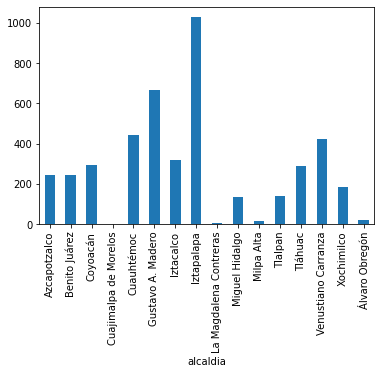

In [61]:
natural_disaster.plot.bar()

In [90]:
violence = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/p_violence.csv')
violence.dropna
print(violence.shape)
violence.head()

(251944, 22)


,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Ano_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
0,8324431,2019,Enero,04/01/2019,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2018.0,Diciembre,22/12/2018,15:30:00,12:23:00,COYOACAN,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611
1,8324435,2019,Enero,04/01/2019,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,04/01/2019,06:00:00,12:27:00,IZTACALCO,AGRICOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983
2,8324438,2019,Enero,04/01/2019,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,FUERO COMUN,2019.0,Enero,03/01/2019,20:00:00,12:35:00,IZTAPALAPA,PROGRESISTA,UNIVERSIDAD,NaN,19.35480,-99.06324
3,8324444,2019,Enero,04/01/2019,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,Femenino,55.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,04/01/2019,08:30:00,12:40:00,ALVARO OBREGON,TOLTECA,CALLE 10,NaN,19.39000,-99.19472
4,8324459,2019,Enero,04/01/2019,ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CO...,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,Masculino,27.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2018.0,Enero,04/01/2018,08:30:00,12:53:00,VENUSTIANO CARRANZA,CUCHILLA PANTITLAN,RIO CHURUBUSCO Y CALLE 1,CALLE 1,19.42102,-99.06775


In [91]:
violence_bool = violence['AlcaldiaHechos'].str.contains("AZCAPOTZALCO|ALVARO OBREGON|BENITO JUAREZ|COYOACAN|CUAUHTEMOC|CUAJIMALPA DE MORELOS|GUSTAVO A MADERO|IZTACALCO|IZTAPALAPA|LA MAGDALENA CONTRERAS|MILPA ALTA|MIGUEL HIDALGO|TLALPAN|TLAHUAC|VENUSTIANO CARRANZA|XOCHIMILCO", na=False)
violence_bool.isna
test_violence = violence[violence_bool]
test_violence.head()

,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Ano_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
0,8324431,2019,Enero,04/01/2019,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2018.0,Diciembre,22/12/2018,15:30:00,12:23:00,COYOACAN,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611
1,8324435,2019,Enero,04/01/2019,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,04/01/2019,06:00:00,12:27:00,IZTACALCO,AGRICOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983
2,8324438,2019,Enero,04/01/2019,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,FUERO COMUN,2019.0,Enero,03/01/2019,20:00:00,12:35:00,IZTAPALAPA,PROGRESISTA,UNIVERSIDAD,NaN,19.35480,-99.06324
3,8324444,2019,Enero,04/01/2019,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,Femenino,55.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,04/01/2019,08:30:00,12:40:00,ALVARO OBREGON,TOLTECA,CALLE 10,NaN,19.39000,-99.19472
4,8324459,2019,Enero,04/01/2019,ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CO...,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,Masculino,27.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2018.0,Enero,04/01/2018,08:30:00,12:53:00,VENUSTIANO CARRANZA,CUCHILLA PANTITLAN,RIO CHURUBUSCO Y CALLE 1,CALLE 1,19.42102,-99.06775


In [92]:
violence = test_violence.groupby(['AlcaldiaHechos'])['AlcaldiaHechos'].count()
violence.head(20)

AlcaldiaHechos
ALVARO OBREGON            19351
AZCAPOTZALCO              13077
BENITO JUAREZ             21741
COYOACAN                  16871
CUAJIMALPA DE MORELOS      3012
CUAUHTEMOC                33581
GUSTAVO A MADERO          25252
IXTLAHUACA                    1
IZTACALCO                 10805
IZTAPALAPA                40952
LA MAGDALENA CONTRERAS     3480
MIGUEL HIDALGO            18588
MILPA ALTA                 1165
NEXTLALPAN                    1
TLAHUAC                    5732
TLALPAN                   14701
VENUSTIANO CARRANZA       14679
XOCHIMILCO                 7527
Name: AlcaldiaHechos, dtype: int64

In [93]:
violence=violence.drop("IXTLAHUACA")
violence=violence.drop("NEXTLALPAN")
violence.head(20)



AlcaldiaHechos
ALVARO OBREGON            19351
AZCAPOTZALCO              13077
BENITO JUAREZ             21741
COYOACAN                  16871
CUAJIMALPA DE MORELOS      3012
CUAUHTEMOC                33581
GUSTAVO A MADERO          25252
IZTACALCO                 10805
IZTAPALAPA                40952
LA MAGDALENA CONTRERAS     3480
MIGUEL HIDALGO            18588
MILPA ALTA                 1165
TLAHUAC                    5732
TLALPAN                   14701
VENUSTIANO CARRANZA       14679
XOCHIMILCO                 7527
Name: AlcaldiaHechos, dtype: int64

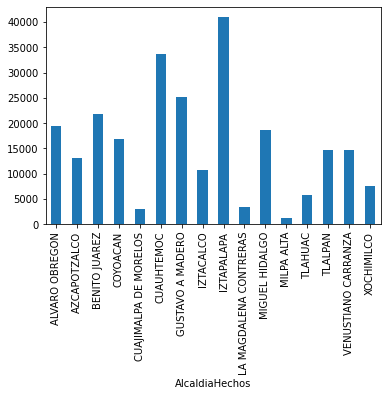

In [94]:
violence.plot.bar()